문제 설명: N,M이 주어지고, NXM행렬이 주어진다. 1은 벽이다. 맨 왼쪽 위(0,0)에서 맨 오른쪽 아래로 가는 최단거리를 출력하라.<br>
벽은 최대 1개까지 뿌시고 갈 수 있다.

    입력
    첫째 줄에 N(1 ≤ N ≤ 1,000), M(1 ≤ M ≤ 1,000)이 주어진다. 다음 N개의 줄에 M개의 숫자로 맵이 주어진다. (1, 1)과 (N, M)은 항상 0이라고 가정하자.

    출력
    첫째 줄에 최단 거리를 출력한다. 불가능할 때는 -1을 출력한다.

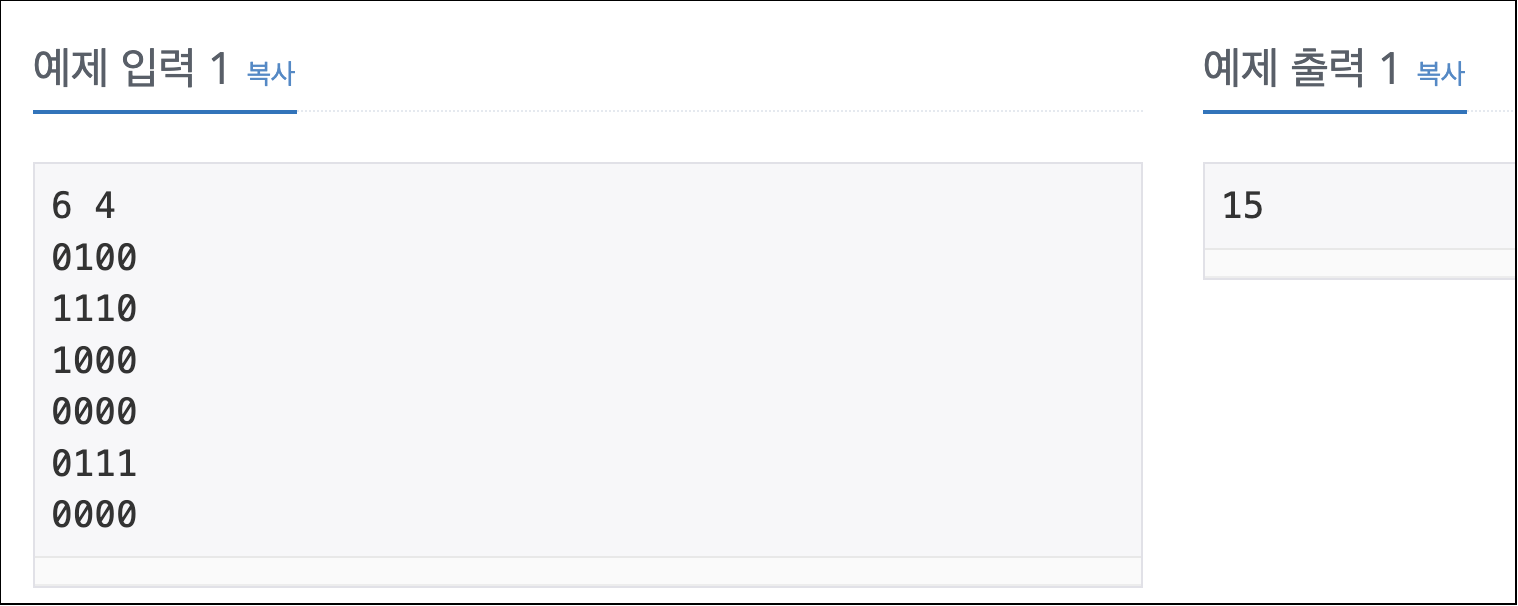

1,1에서 오른쪽으로 가는 1을 부수고 가서 ㄹ 자로 가면 15칸으로 맨 오른쪽아래에 도착할 수 있다.

    상상코딩: 맨 왼쪽 위 (0,0)에서 오른쪽, 왼쪽, 아래, 위 4가지 방향으로 갈 수 있는 방향으로 BFS를 진행한다.
    BFS를 진행할 떄 1을 한번 지날 수 있게 설계해야한다. 어떻게 할지 잘 모르겠다.

### 정답 풀이

In [80]:
from collections import deque

n, m = 6,4 #  map(int, input().split())

# 3차원 행렬을 통해 벽의 파괴를 파악함. visited[x][y][0]은 벽 파괴 가능. [x][y][1]은 불가능.
visited = [[[0] * 2 for _ in range(m)] for _ in range(n)]
visited[0][0][0] = 1

In [81]:
visited

[[[1, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

In [82]:
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

0100
1110
1000
0000
0111
0000


In [83]:
graph

[[0, 1, 0, 0],
 [1, 1, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 1, 1, 1],
 [0, 0, 0, 0]]

In [84]:
# 상하좌우
dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]


def bfs(x, y, z):
    queue = deque()
    queue.append((x, y, z))

    while queue:
        a, b, c = queue.popleft()
        print(a,b,c)
        # 끝 점에 도달하면 이동 횟수를 출력
        if a == n - 1 and b == m - 1:
            return visited[a][b][c]
        for i in range(4):
            nx = a + dx[i]
            ny = b + dy[i]
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            # 다음 이동할 곳이 벽이고, 벽파괴기회를 사용하지 않은 경우
            if graph[nx][ny] == 1 and c == 0 :
                visited[nx][ny][1] = visited[a][b][0] + 1
                print("벽 부시기",c)
                display(visited)                
                queue.append((nx, ny, 1))
            # 다음 이동할 곳이 벽이 아니고, 아직 한 번도 방문하지 않은 곳이면
            elif graph[nx][ny] == 0 and visited[nx][ny][c] == 0:
                visited[nx][ny][c] = visited[a][b][c] + 1
                print("이동")
                display(visited)                
                queue.append((nx, ny, c))
    return -1


print(bfs(0, 0, 0))

0 0 0
벽 부시기 0


[[[1, 0], [0, 2], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

벽 부시기 0


[[[1, 0], [0, 2], [0, 0], [0, 0]],
 [[0, 2], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

0 1 1
이동


[[[1, 0], [0, 2], [0, 3], [0, 0]],
 [[0, 2], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

이동


[[[1, 3], [0, 2], [0, 3], [0, 0]],
 [[0, 2], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

1 0 1
0 2 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

0 0 1
0 3 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

1 3 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 0], [0, 0], [0, 6]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

2 3 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 0], [0, 7], [0, 6]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 0], [0, 7], [0, 6]],
 [[0, 0], [0, 0], [0, 0], [0, 7]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

2 2 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 0], [0, 0], [0, 0], [0, 7]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 0], [0, 0], [0, 8], [0, 7]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

3 3 1
2 1 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 0], [0, 9], [0, 8], [0, 7]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

3 2 1
3 1 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 10], [0, 9], [0, 8], [0, 7]],
 [[0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

3 0 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 10], [0, 9], [0, 8], [0, 7]],
 [[0, 11], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0]]]

4 0 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 10], [0, 9], [0, 8], [0, 7]],
 [[0, 11], [0, 0], [0, 0], [0, 0]],
 [[0, 12], [0, 0], [0, 0], [0, 0]]]

5 0 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 10], [0, 9], [0, 8], [0, 7]],
 [[0, 11], [0, 0], [0, 0], [0, 0]],
 [[0, 12], [0, 13], [0, 0], [0, 0]]]

5 1 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 10], [0, 9], [0, 8], [0, 7]],
 [[0, 11], [0, 0], [0, 0], [0, 0]],
 [[0, 12], [0, 13], [0, 14], [0, 0]]]

5 2 1
이동


[[[1, 3], [0, 2], [0, 3], [0, 4]],
 [[0, 2], [0, 0], [0, 0], [0, 5]],
 [[0, 0], [0, 8], [0, 7], [0, 6]],
 [[0, 10], [0, 9], [0, 8], [0, 7]],
 [[0, 11], [0, 0], [0, 0], [0, 0]],
 [[0, 12], [0, 13], [0, 14], [0, 15]]]

5 3 1
15


### 안보고 풀어보기

In [86]:
!conda env list

# conda environments:
#
base                     /Users/cwj/miniconda3
tf25                  *  /Users/cwj/miniconda3/envs/tf25
                         /Users/cwj/opt/anaconda3



In [85]:
import tensorflow